In [1]:
#import libs
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#reading data
data = pd.read_csv(r"E:\Education\Data ML\train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#drop useless columns
data.drop(labels=["Cabin","PassengerId","Ticket"],axis=1,inplace=True)

In [8]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [9]:
#fill null values
data["Age"] = data.Age.fillna(data["Age"].mean())
data["Embarked"] = data.Embarked.fillna("S")

In [10]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
data["Sex"] = data["Sex"].map({"male":0,"female":1})
data["Embarked"] = data["Embarked"].map({"S":0,"C":1,"Q":2})

In [12]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [14]:
data["Title"] = data.Name.str.extract("([A-Za-z]+)\.",expand = False)

In [15]:
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

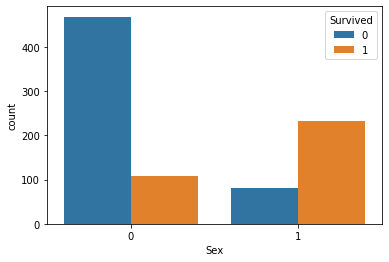

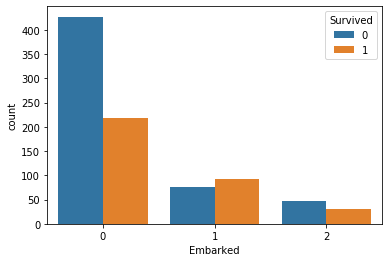

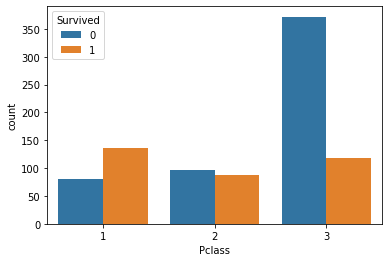

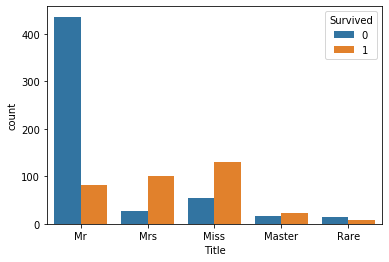

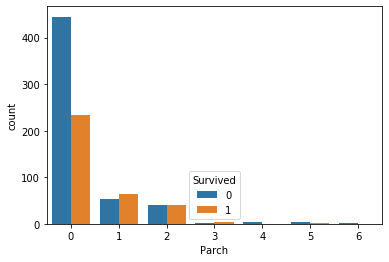

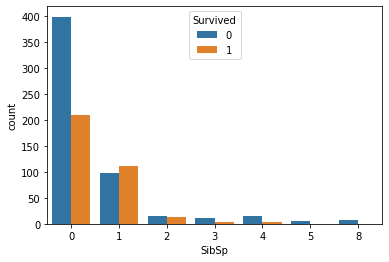

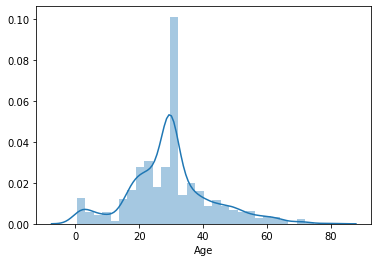

In [16]:
#plotting data
plt.subplots()
plt.show(sb.countplot(x='Sex',data=data, hue='Survived'))
plt.show(sb.countplot(x='Embarked',data=data, hue='Survived'))
plt.show(sb.countplot(x='Pclass',data=data, hue='Survived'))
plt.show(sb.countplot(x='Title',data=data, hue='Survived'))
plt.show(sb.countplot(x='Parch',data=data, hue='Survived'))
plt.show(sb.countplot(x='SibSp',data=data, hue='Survived'))
plt.show(sb.distplot(data['Age'],bins=30))

In [17]:
data.drop(["Name","Title"],axis=1,inplace=True)

In [18]:
#data preprocessing
ages = np.array(data["Age"]).reshape(-1,1)
fare = np.array(data["Fare"]).reshape(-1,1)
SC = StandardScaler()

In [19]:
data["Age"] = SC.fit_transform(ages)
data["Fare"] = SC.fit_transform(fare)

In [20]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,-0.592481,1,0,-0.502445,0
1,1,1,1,0.638789,1,0,0.786845,1
2,1,3,1,-0.284663,0,0,-0.488854,0
3,1,1,1,0.407926,1,0,0.420730,0
4,0,3,0,0.407926,0,0,-0.486337,0


In [21]:
features = data.iloc[:,1:].values
target = data["Survived"]

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, train_size = 0.8, random_state = 5)

In [23]:
logreg = LogisticRegression()
Dtree = DecisionTreeClassifier()
SVM = SVC()
random_forest = RandomForestClassifier(n_estimators=100)
perceptron = Perceptron()
sgd = SGDClassifier()
NB = GaussianNB()

In [24]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
Dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
SVM.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
random_forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
perceptron.fit(X_train,Y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
sgd.fit(X_train,Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
NB.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
logreg_pred = logreg.predict(X_test)
Dtree_pred = Dtree.predict(X_test)
SVM_pred = SVM.predict(X_test)
RF_pred = random_forest.predict(X_test)
perceptron_pred = perceptron.predict(X_test)
sgd_pred = sgd.predict(X_test)
NB_pred = NB.predict(X_test)

In [32]:
acc_LR = metrics.accuracy_score(Y_test,logreg_pred)*100
acc_DT = metrics.accuracy_score(Y_test,Dtree_pred)*100
acc_SVM = metrics.accuracy_score(Y_test,SVM_pred)*100
acc_RF = metrics.accuracy_score(Y_test,RF_pred)*100
acc_Pers = metrics.accuracy_score(Y_test,perceptron_pred)*100
acc_SGD = metrics.accuracy_score(Y_test,sgd_pred)*100
acc_NB = metrics.accuracy_score(Y_test,NB_pred)*100

In [33]:
Voting_clf = VotingClassifier(estimators=[("Logreg",logreg),("DTree",Dtree),("SVC",SVM),("RF",random_forest),("pers",perceptron),("SGD",sgd),("NB",NB)],voting="hard")

In [34]:
Voting_clf.fit(X_train,Y_train)

VotingClassifier(estimators=[('Logreg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('DTree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion=...
                                        

In [35]:
preds = Voting_clf.predict(X_test)

In [36]:
acc = metrics.accuracy_score(Y_test,preds)

In [37]:
acc*100

85.47486033519553

In [39]:
models = pd.DataFrame({'Model': ["Logistic Regression",'Decision Tree','Support Vector Machines', 'Random Forest','Perceptron','Stochastic Gradient Decent','Naive Bayes'],'Score': [acc_LR, acc_DT, acc_SVM,acc_RF, acc_Pers, acc_SGD,acc_NB]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Support Vector Machines,84.357542
3,Random Forest,82.681564
6,Naive Bayes,82.681564
0,Logistic Regression,81.005587
1,Decision Tree,78.212291
5,Stochastic Gradient Decent,76.536313
4,Perceptron,67.597765
